# Image intensity
Images may be taken in lighting conditions that skew the distribution of intensities and this can be corrected using histogram equalisation. Here we will artificially darken/lighten and change the contrast on an image to showhow histogram equalisation works.

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from os.path import join

In [9]:
def squash_image(image, target_range=(0, 255)):
    """
    Normalize the pixel values of an image to a specific range.
    
    Parameters:
    - image: NumPy array representing the image.
    - target_range: Tuple representing the target range (min, max).
    
    Returns:
    - normalized_image: NumPy array with pixel values normalized to the target range.
    """
    # Get the min and max values of the original image
    min_val = np.min(image)
    max_val = np.max(image)
    
    # Calculate the scale and shift to squash the values
    scale = (target_range[1] - target_range[0]) / (max_val - min_val)
    shift = target_range[0] - min_val * scale
    
    # Apply the scaling and shifting
    normalized_image = image * scale + shift
    
    # Clip values to ensure they are within the target range
    normalized_image = np.clip(normalized_image, target_range[0], target_range[1])
    
    # Convert to the appropriate data type (e.g., uint8 for images with range [0, 255])
    normalized_image = normalized_image.astype(np.uint8)
    
    return normalized_image


def set_contrast(image, contrast_factor):
    """
    Adjust the contrast of an image.
    
    Parameters:
    - image: NumPy array representing the image.
    - contrast_factor: Float value where 1.0 means no change, less than 1.0 decreases contrast,
      and greater than 1.0 increases contrast.
    
    Returns:
    - contrast_image: NumPy array with adjusted contrast.
    """
    # Calculate the mean pixel value
    mean = np.mean(image)
    
    # Adjust contrast
    contrast_image = (image - mean) * contrast_factor + mean
    
    # Clip values to ensure they are within the valid range
    contrast_image = np.clip(contrast_image, 0, 255)
    
    # Convert to the appropriate data type (e.g., uint8 for images with range [0, 255])
    contrast_image = contrast_image.astype(np.uint8)
    
    return contrast_image

First we load an image as a grayscale image

In [10]:
image_path_gray = join('images', 'image_gray.jpg')
image_gray = cv2.imread(image_path_gray, cv2.IMREAD_GRAYSCALE)

In [11]:
dark_image = squash_image(image_gray, target_range=(0, 50))
bright_image = squash_image(image_gray, target_range=(200, 255))
low_contrast_image = set_contrast(image_gray, contrast_factor=0.5)
high_constrast_image = set_contrast(image_gray, contrast_factor=1.5)

In [12]:
def histogram_equalisation(gray_image):
    # Calculate the histogram
    hist, bins = np.histogram(gray_image.flatten(), 256, [0, 256])

    # Calculate the cumulative distribution function (CDF)
    cdf = hist.cumsum()
    cdf_normalized = cdf / cdf.max()

    # Mask all pixels with value 0 and apply histogram equalization
    cdf_m = np.ma.masked_equal(cdf_normalized, 0)
    cdf_m = (cdf_m - cdf_m.min()) * 256 / (cdf_m.max() - cdf_m.min())
    cdf = np.ma.filled(cdf_m, 0).astype('uint8')

    # Apply the CDF to get the equalized image
    image_equalised = cdf[gray_image]

    return image_equalised

In [13]:
def display_image_hist_and_cdf(image_gray, name=''):
    
    # Create a figure with three subplots
    fig, ax = plt.subplots(1, 3, figsize=(18, 6))
    
    # Display the equalized image
    ax[0].imshow(image_equalised, cmap='gray')
    ax[0].set_title(f'Histogram Equalized Image {name}')
    ax[0].axis('off')  # Hide axes
    
    # Plot the histogram
    hist, bins = np.histogram(image_gray.flatten(), 256, [0, 256])
    ax[1].bar(range(256), hist, color='gray', width=1)
    ax[1].set_title('Histogram')
    ax[1].set_xlim([0, 255])
    ax[1].set_xlabel('Pixel Intensity')
    ax[1].set_ylabel('Frequency')
    
    # Plot the CDF
    cdf = hist.cumsum()
    cdf_normalized = cdf / cdf.max()
    ax[2].plot(cdf_normalized, color='blue')
    ax[2].set_title('Cumulative Distribution Function (CDF)')
    ax[2].set_xlim([0, 255])
    # ax[2].set_ylim([0, 1])
    ax[2].set_xlabel('Pixel Intensity')
    ax[2].set_ylabel('Cumulative Probability')
    
    plt.tight_layout()
    plt.show()

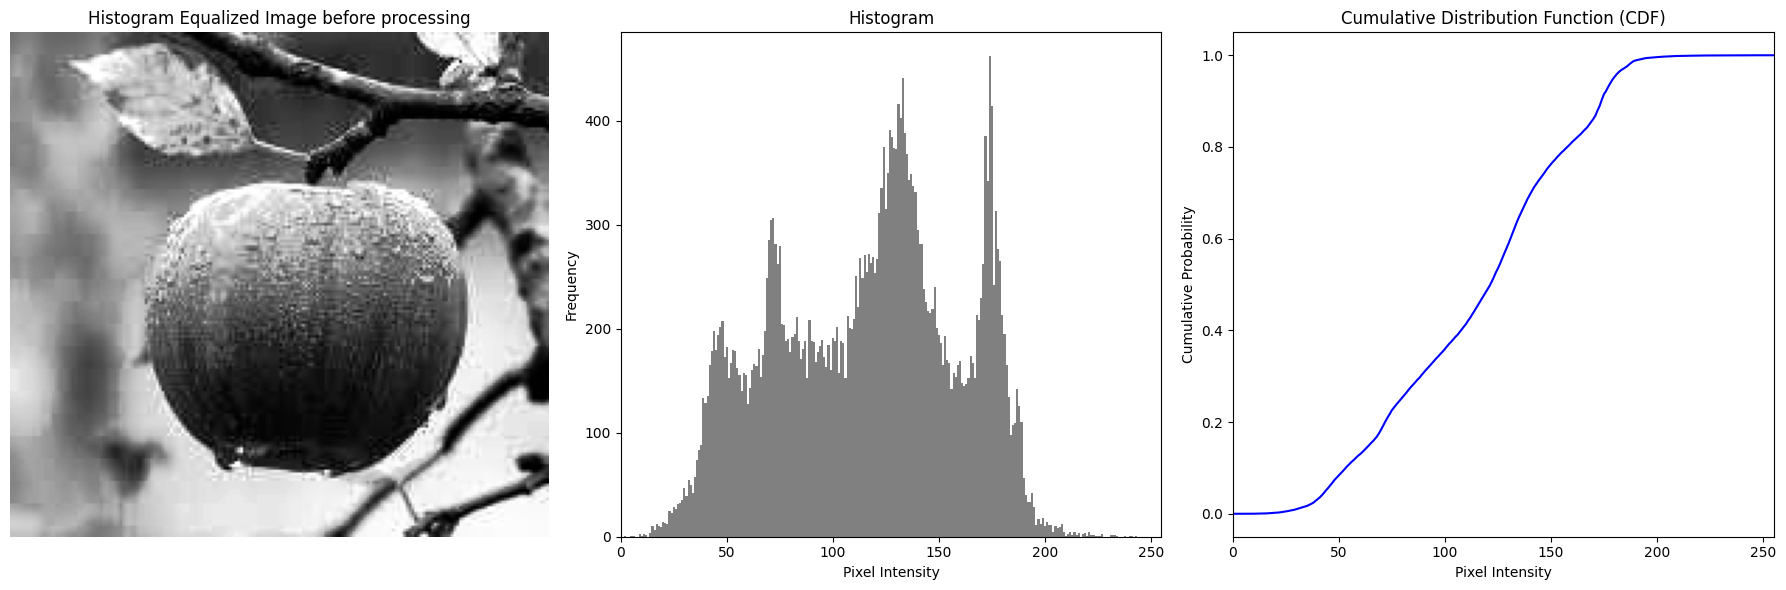

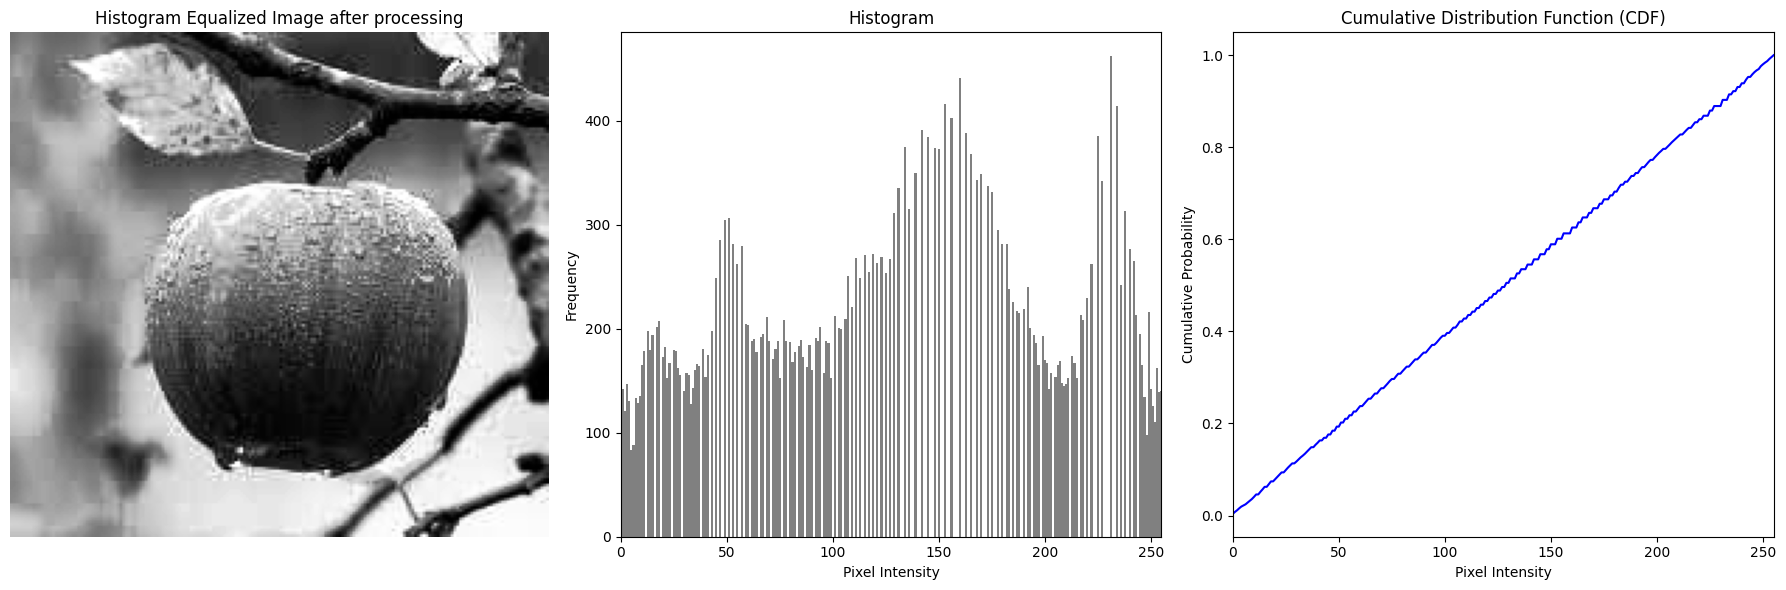

In [14]:
image_equalised = histogram_equalisation(image_gray)
display_image_hist_and_cdf(image_gray, 'before processing')
display_image_hist_and_cdf(image_equalised, name='after processing')

Now using all the available images 

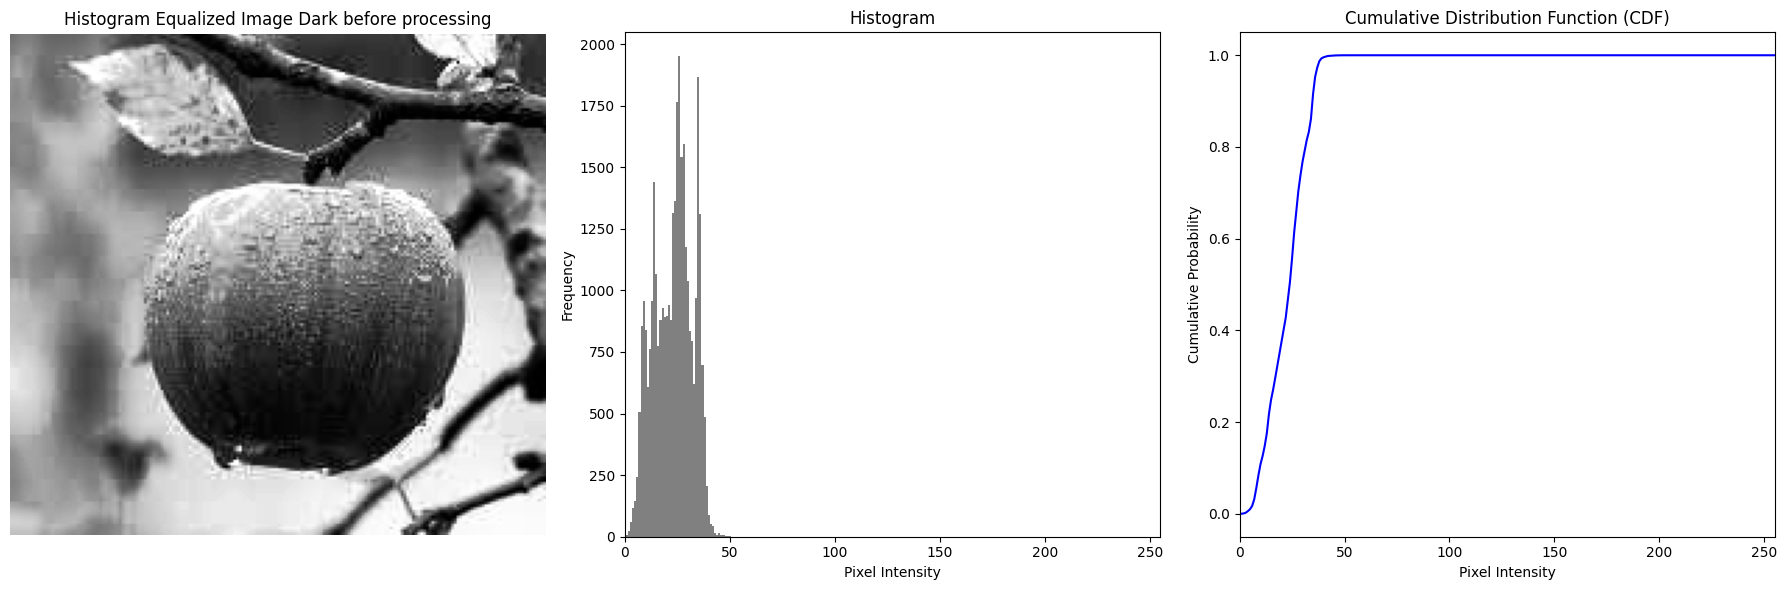

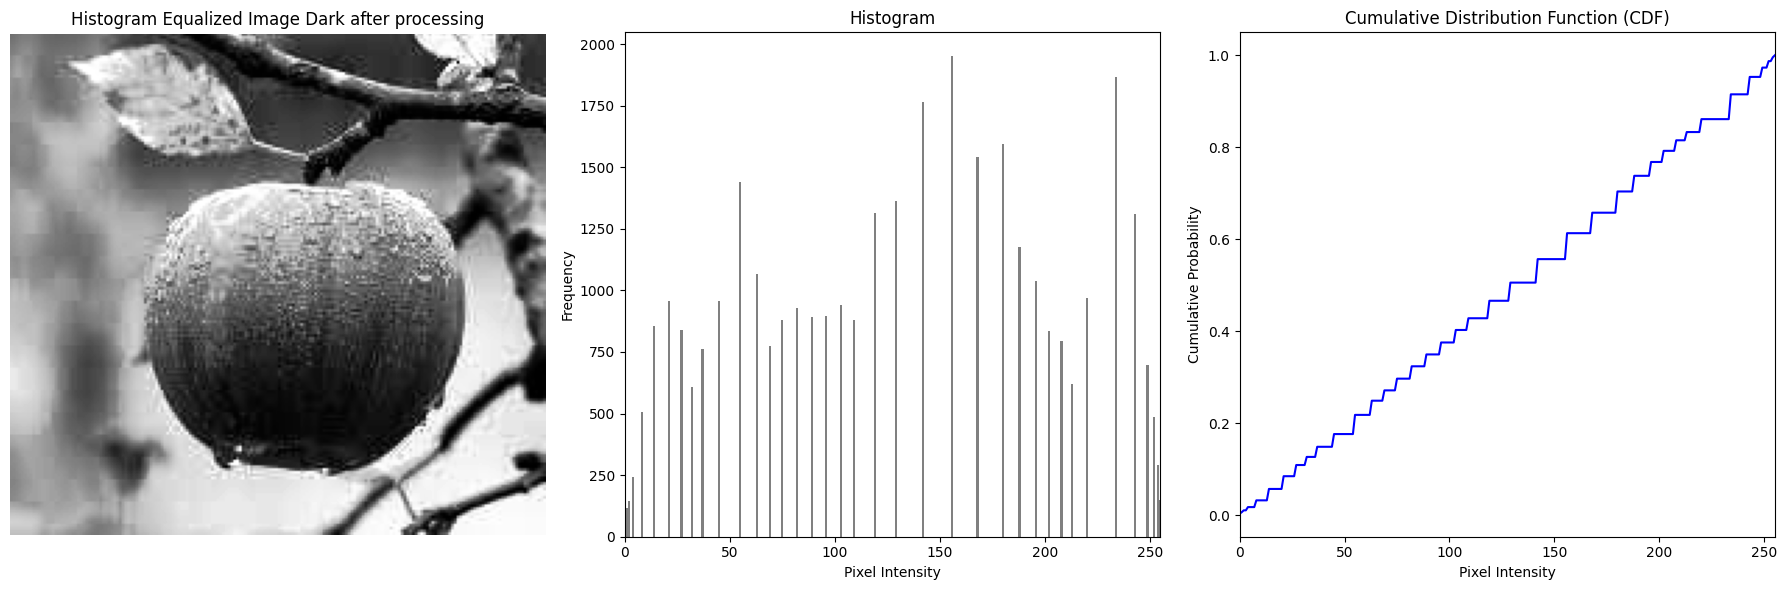

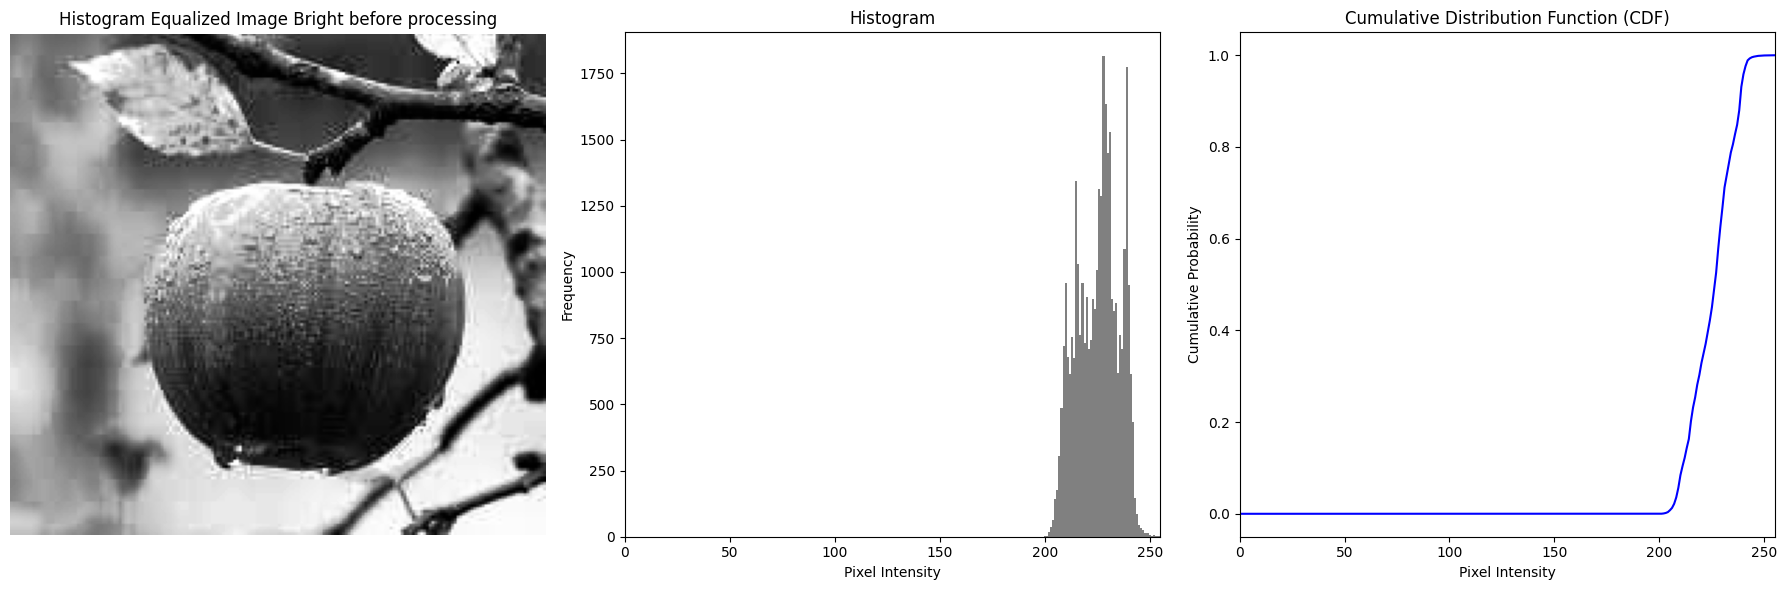

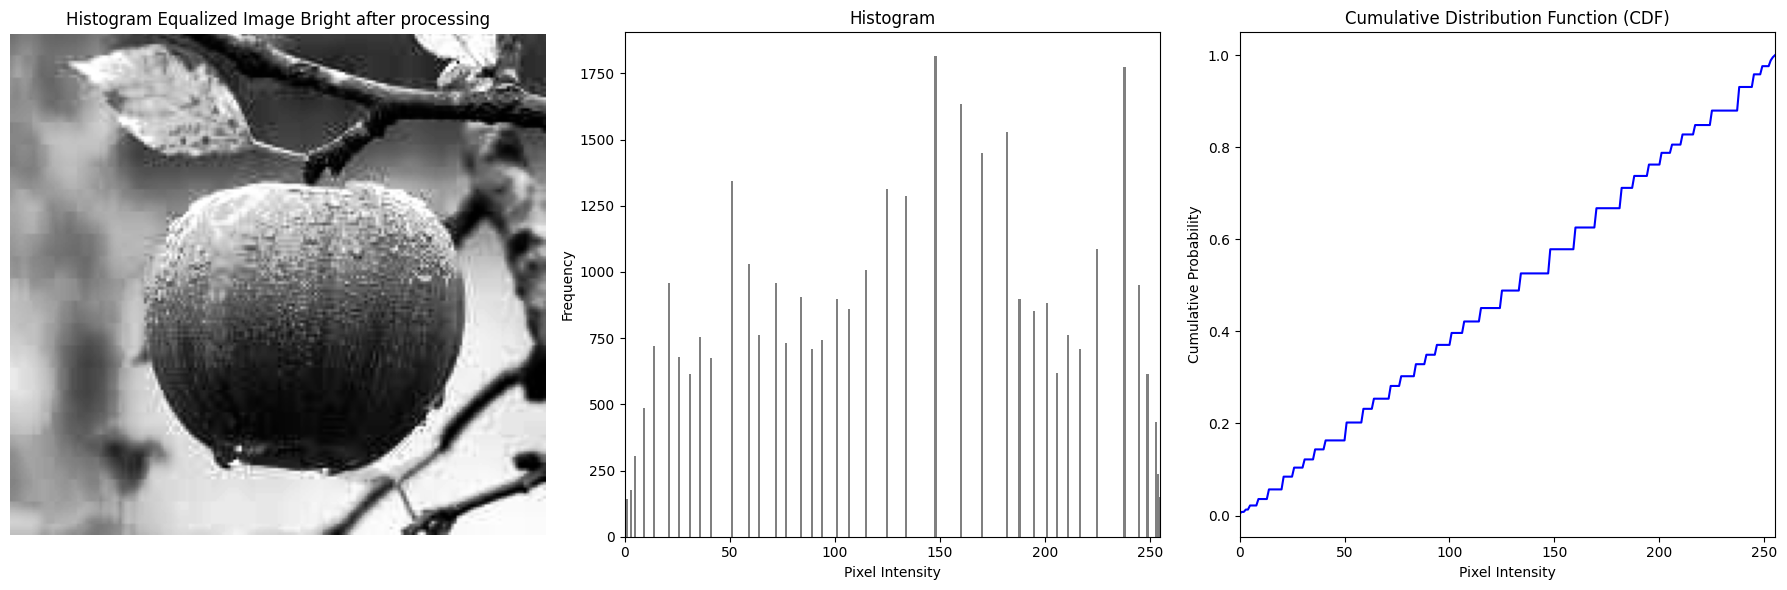

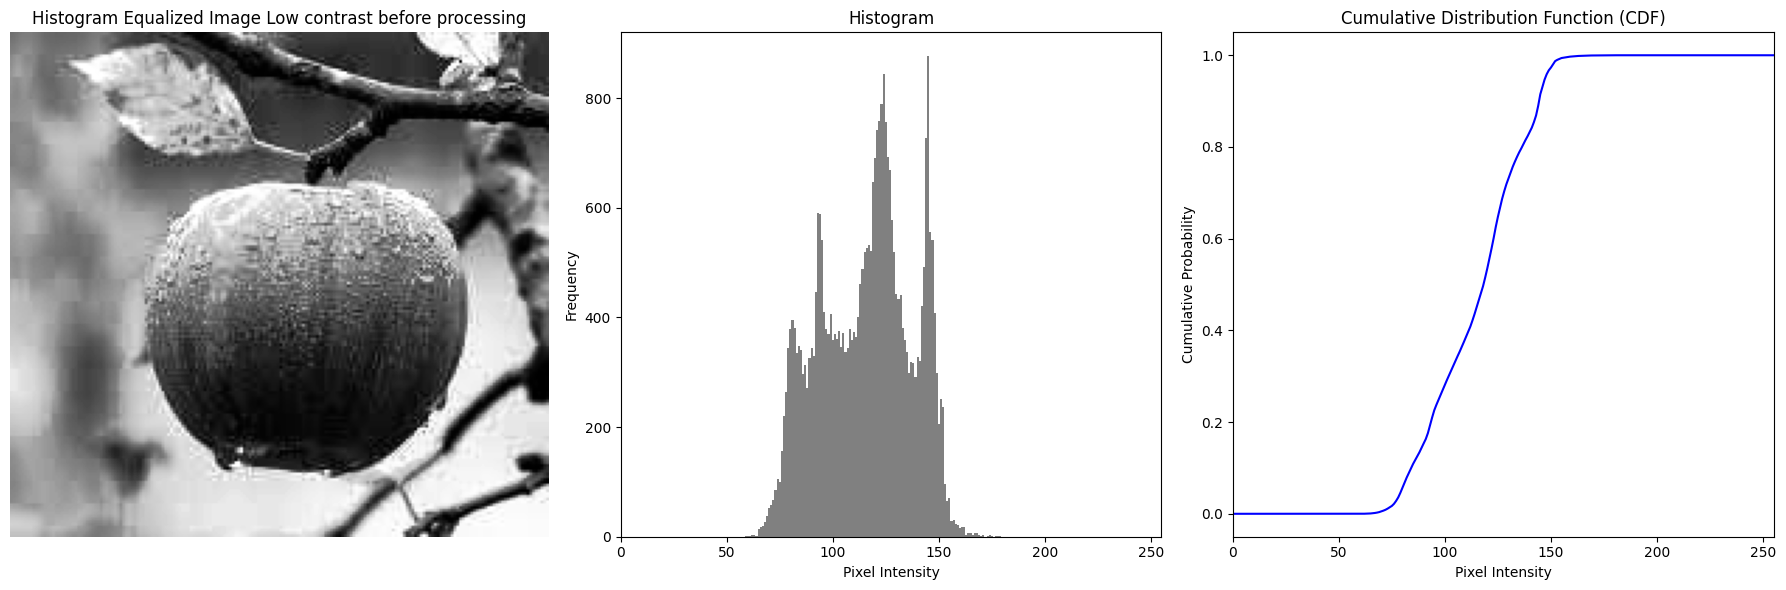

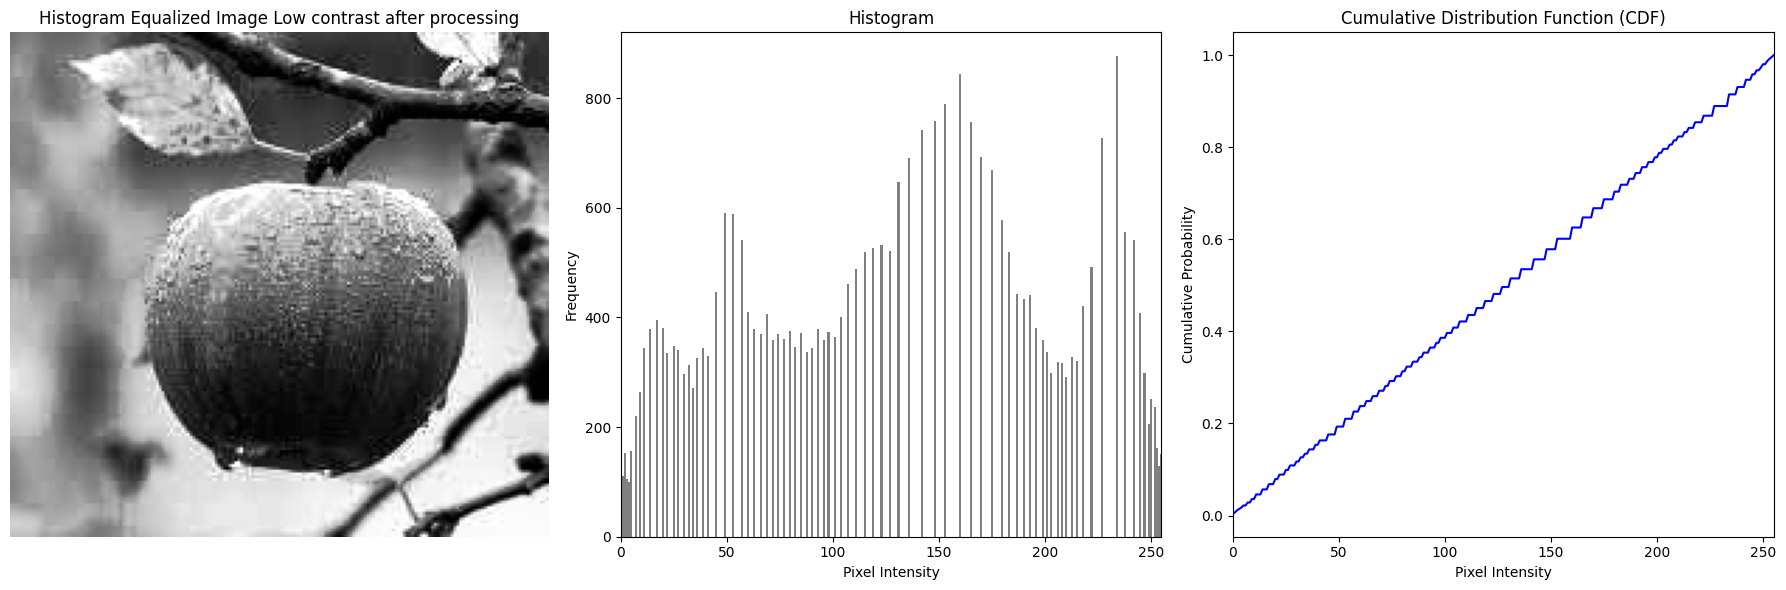

In [ ]:
for img, name in zip((dark_image, bright_image, low_contrast_image, high_constrast_image),( 'Dark', 'Bright', 'Low contrast', 'High contrast')):
    display_image_hist_and_cdf(img, name = name+' before processing')
    img_equalised = histogram_equalisation(img)
    display_image_hist_and_cdf(img_equalised, name=name+' after processing')